In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as la
import math
from scipy.fftpack import fft,fftfreq
from scipy.linalg import toeplitz
from matplotlib import animation
from sklearn.model_selection import train_test_split
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [ ]:
df =  pd.read_csv("data.csv")
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [ ]:
df.describe()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
count,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,...,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0,92000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(92000, 1025)

In [ ]:
df = df.sample(frac=1).reset_index(drop = True)
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_02_kha
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_26_yaw
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_19_dha


In [ ]:
from sklearn.preprocessing import LabelBinarizer

df2 = df.copy()

df = df.drop(['character'],axis=1)
X = df.to_numpy()
X = np.reshape(X,(X.shape[0],32,32,1))


label = df2['character'].values

binencoder = LabelBinarizer()
y = binencoder.fit_transform(label)

print(X.shape)
print(y.shape)

(92000, 32, 32, 1)
(92000, 46)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(73600, 32, 32, 1)
(18400, 32, 32, 1)
(73600, 46)
(18400, 46)


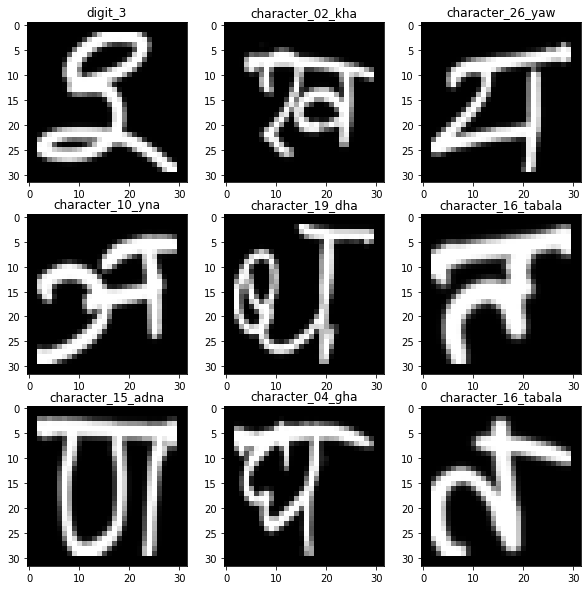

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.title(str(label[i]))
    plt.imshow(X[i].reshape((32,32)),cmap='gray')
# show the plot
plt.show()

In [ ]:
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [ ]:

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
hist = model.fit(x_train,y_train,batch_size=128,epochs=15,verbose=1, validation_split= 0.15)

Epoch 1/15
489/489 [==============================] - 112s 228ms/step - loss: 2.4563 - accuracy: 0.5478 - val_loss: 0.2827 - val_accuracy: 0.9142
Epoch 2/15
489/489 [==============================] - 108s 222ms/step - loss: 0.2075 - accuracy: 0.9368 - val_loss: 0.1293 - val_accuracy: 0.9607
Epoch 3/15
489/489 [==============================] - 109s 222ms/step - loss: 0.1183 - accuracy: 0.9622 - val_loss: 0.0960 - val_accuracy: 0.9730
Epoch 4/15
489/489 [==============================] - 111s 228ms/step - loss: 0.0819 - accuracy: 0.9732 - val_loss: 0.1005 - val_accuracy: 0.9710
Epoch 5/15
489/489 [==============================] - 111s 227ms/step - loss: 0.0631 - accuracy: 0.9792 - val_loss: 0.0959 - val_accuracy: 0.9721
Epoch 6/15
489/489 [==============================] - 110s 225ms/step - loss: 0.0554 - accuracy: 0.9819 - val_loss: 0.0863 - val_accuracy: 0.9767
Epoch 7/15
489/489 [==============================] - 111s 227ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 0.0806 -

<Figure size 432x288 with 0 Axes>

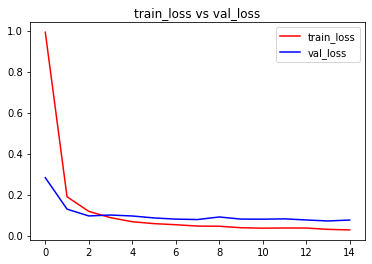

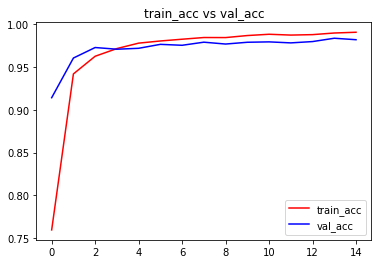

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [ ]:
model.evaluate(x_test, y_test,batch_size=128)


144/144 [==============================] - 6s 39ms/step - loss: 0.0742 - accuracy: 0.9814


[0.07416731119155884, 0.9813587069511414]